In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nsscdataset/sampled_data.npz
/kaggle/input/nsscdataset/test_data.npz


We have used sampled_data.npz for training the data and test_data.npz for testing the data.
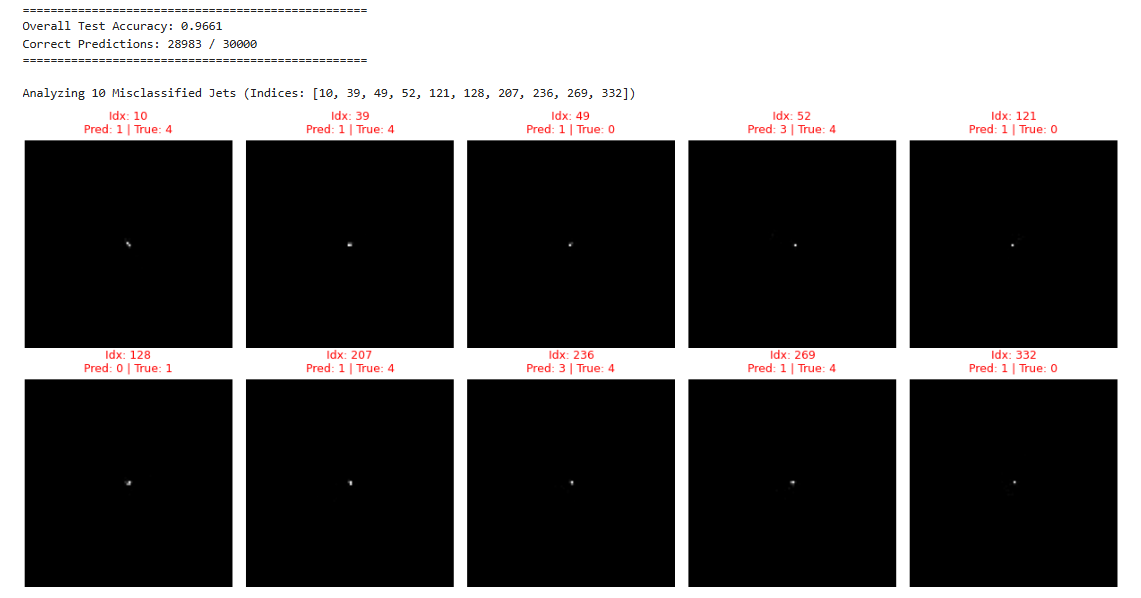

In [2]:
data = np.load('/kaggle/input/nsscdataset/sampled_data.npz')
X = data['x']
y = data['y']

In [3]:
data = np.load('/kaggle/input/nsscdataset/test_data.npz')
X_test = data['x']
y_test = data['y']

In [26]:
X_test.shape

(30000, 100, 100, 1)

In [27]:
X.shape

(30000, 100, 100, 1)

In [4]:
X = X.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2025-10-16 16:25:28.704410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760631928.943323      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760631929.014884      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
X = X.reshape((-1, 100, 100, 1))
X_test = X_test.reshape((-1, 100, 100, 1))

In [7]:
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)
y_test = to_categorical(y_test, num_classes)


Final Model

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1), name='conv1'),
    MaxPooling2D((2, 2), name='pool1'),
    
    Conv2D(128, (3, 3), activation='relu', name='conv2'),
    MaxPooling2D((2, 2), name='pool2'),
    
    Conv2D(128, (3, 3), activation='relu', name='conv3'),
    MaxPooling2D((2, 2), name='pool3'),
    
    Flatten(name='flatten'),
    Dropout(0.2, name='dropout1'),
    
    Dense(256, activation='relu', name='dense1'),
    Dropout(0.2, name='dropout2'),
    
    Dense(num_classes, activation='softmax', name='output')
])

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to verify
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 47, 47, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 21, 21, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,463,237 (13.21 MB)

 Trainable params: 3,463,237 (13.21 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Training

In [12]:
history = model.fit(
    X, y,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    verbose=1
)

Epoch 1/100


I0000 00:00:1760632052.009486     102 service.cc:148] XLA service 0x7ef340004d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760632052.010387     102 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760632052.010419     102 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760632052.344552     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


  7/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.2223 - loss: 1.5995

I0000 00:00:1760632057.095124     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.4720 - loss: 1.2495 - val_accuracy: 0.6172 - val_loss: 1.0196
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.6067 - loss: 1.0342 - val_accuracy: 0.6273 - val_loss: 0.9728
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.6328 - loss: 0.9965 - val_accuracy: 0.6438 - val_loss: 0.9599
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6444 - loss: 0.9602 - val_accuracy: 0.6552 - val_loss: 0.9195
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6424 - loss: 0.9562 - val_accuracy: 0.6565 - val_loss: 0.9272
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.6525 - loss: 0.9373 - val_accuracy: 0.6565 - val_loss: 0.9076
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.6706 - loss: 0.9059 - val_accuracy: 0.6738 - val_loss: 0.8565
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.6725 - loss: 0.8807 - val_

Evaluation

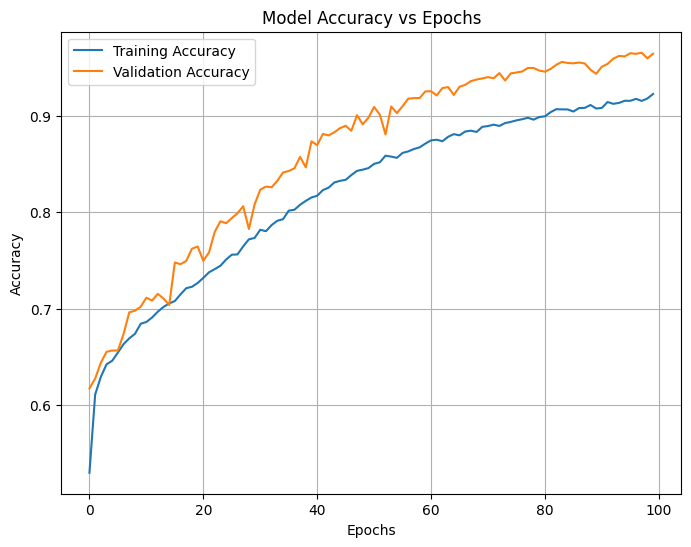

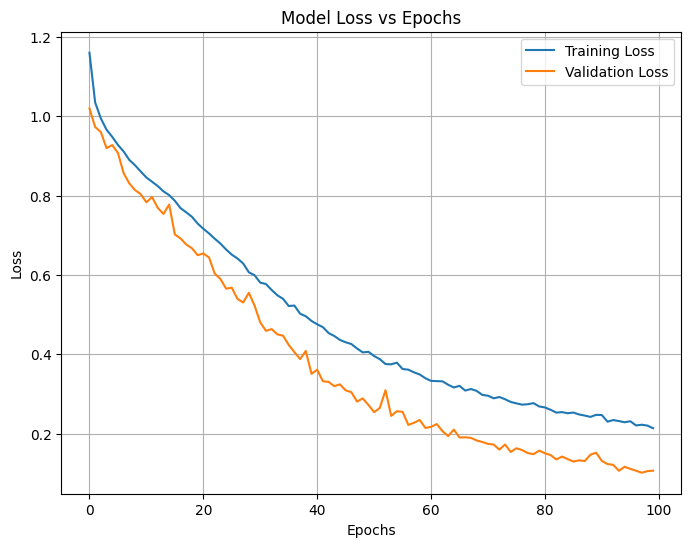

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      6042
           1       0.87      0.98      0.92      5826
           2       1.00      1.00      1.00      6061
           3       0.99      0.97      0.98      6058
           4       0.99      0.96      0.98      6013

    accuracy                           0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000



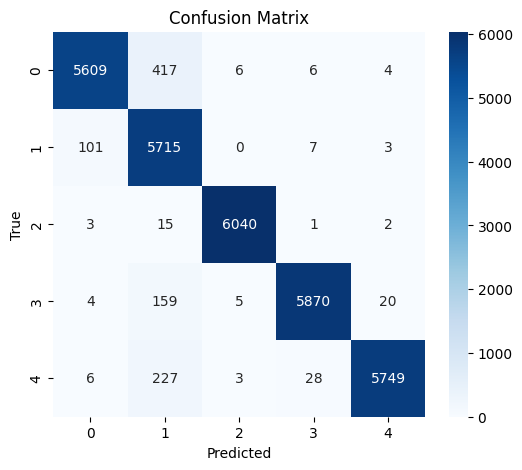

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))


cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [30]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)



y_proba = model.predict(X_test)
y_pred = np.argmax(y_proba, axis=1)


if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test


accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='macro')
recall = recall_score(y_test_labels, y_pred, average='macro')
f1 = f1_score(y_test_labels, y_pred, average='macro')


if len(y_test.shape) == 1 or y_test.shape[1] == 1:

    from tensorflow.keras.utils import to_categorical
    y_test_onehot = to_categorical(y_test_labels, num_classes=y_proba.shape[1])
else:
    y_test_onehot = y_test

roc_auc = roc_auc_score(y_test_onehot, y_proba, multi_class='ovr', average='macro')


print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")



print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred))


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Accuracy:  0.9661
Precision: 0.9681
Recall:    0.9662
F1-score:  0.9663
ROC AUC:   0.9984

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      6042
           1       0.87      0.98      0.92      5826
           2       1.00      1.00      1.00      6061
           3       0.99      0.97      0.98      6058
           4       0.99      0.96      0.98      6013

    accuracy                           0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000

Confusion Matrix:
 [[5609  417    6    6    4]
 [ 101 5715    0    7    3]
 [   3   15 6040    1    2]
 [   4  159    5 5870   20]
 [   6  227    3   28 5749]]



Micro-average ROC AUC: 0.9988
Class 0 ROC AUC: 0.9977
Class 1 ROC AUC: 0.9955
Class 2 ROC AUC: 1.0000
Class 3 ROC AUC: 0.9995
Class 4 ROC AUC: 0.9991


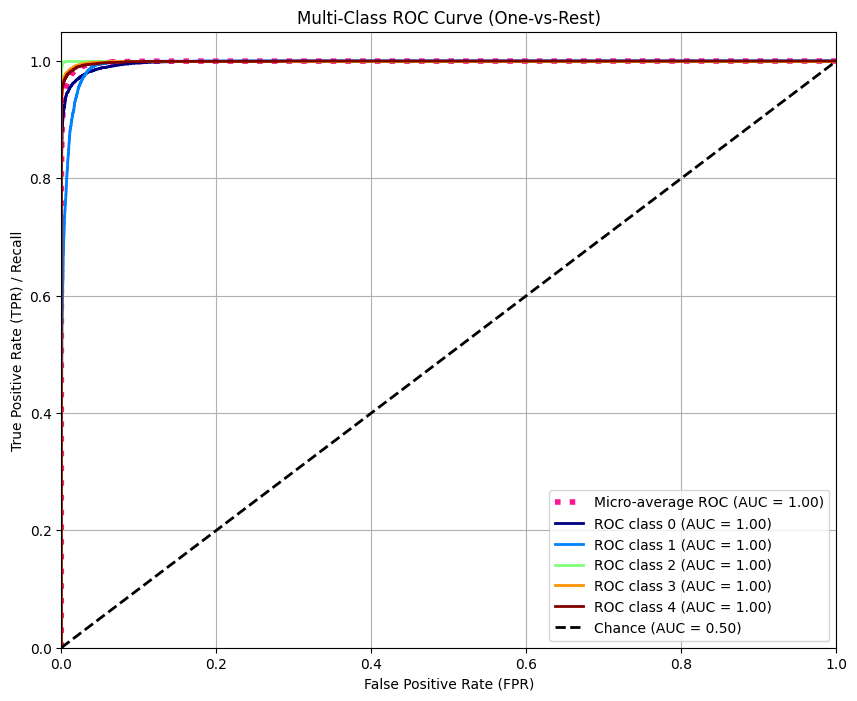

In [22]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

n_classes = y_pred.shape[1] 
y_true_binarized = label_binarize(y_true, classes=np.arange(n_classes))
roc_auc_micro = roc_auc_score(y_true_binarized, y_pred, average="micro")
print(f"\nMicro-average ROC AUC: {roc_auc_micro:.4f}")


fpr = dict()
tpr = dict()
roc_auc = dict()


for i in range(n_classes):

    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"Class {i} ROC AUC: {roc_auc[i]:.4f}")


plt.figure(figsize=(10, 8))


fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_pred.ravel())
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc_micro:.2f})',
         color='deeppink', linestyle=':', linewidth=4)


colors = plt.cm.jet(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC class {i} (AUC = {roc_auc[i]:.2f})')


plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Multi-Class ROC Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Feature Extraction, Plotting and getting some misclassified jet images.

Indices in X_test of the Top 3 Highest Accuracy Inputs: [    1 12435 12426]
Visualizing Feature Maps for Top Input #1 (Index: 1)


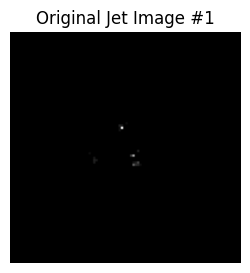

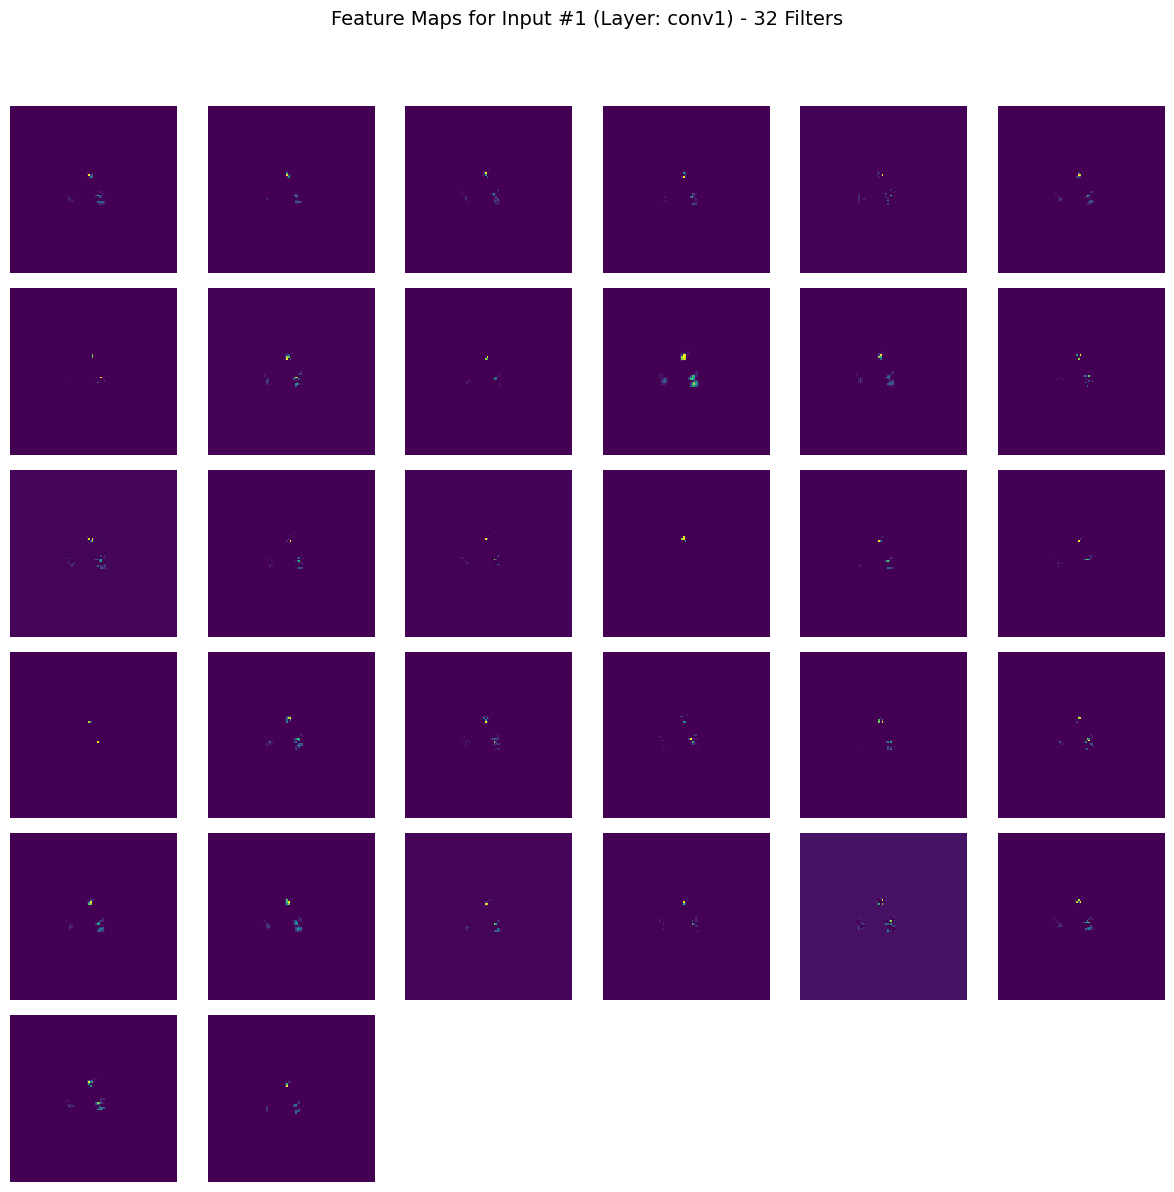

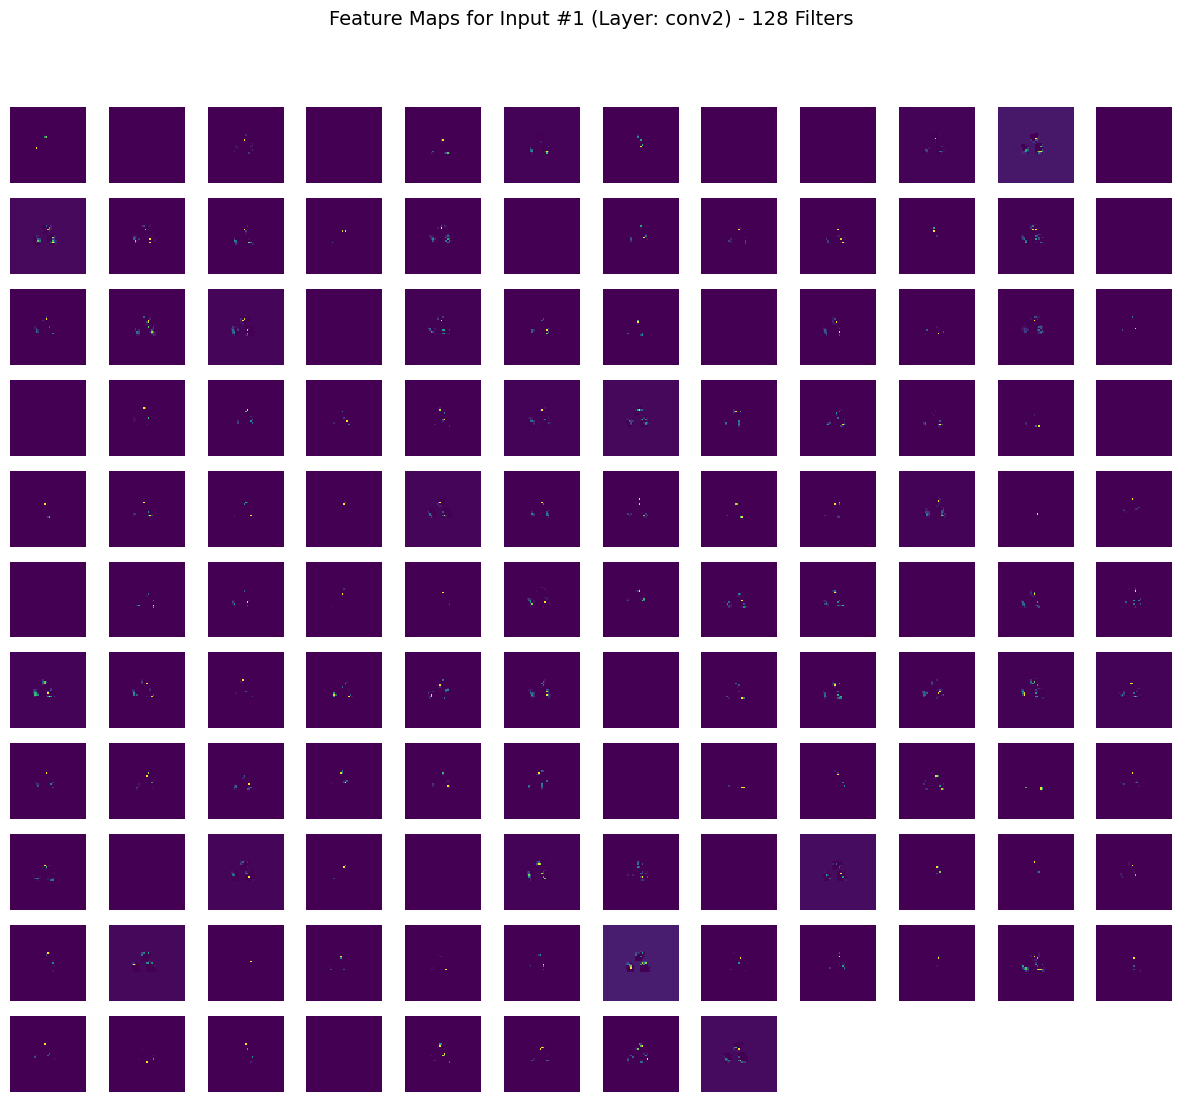

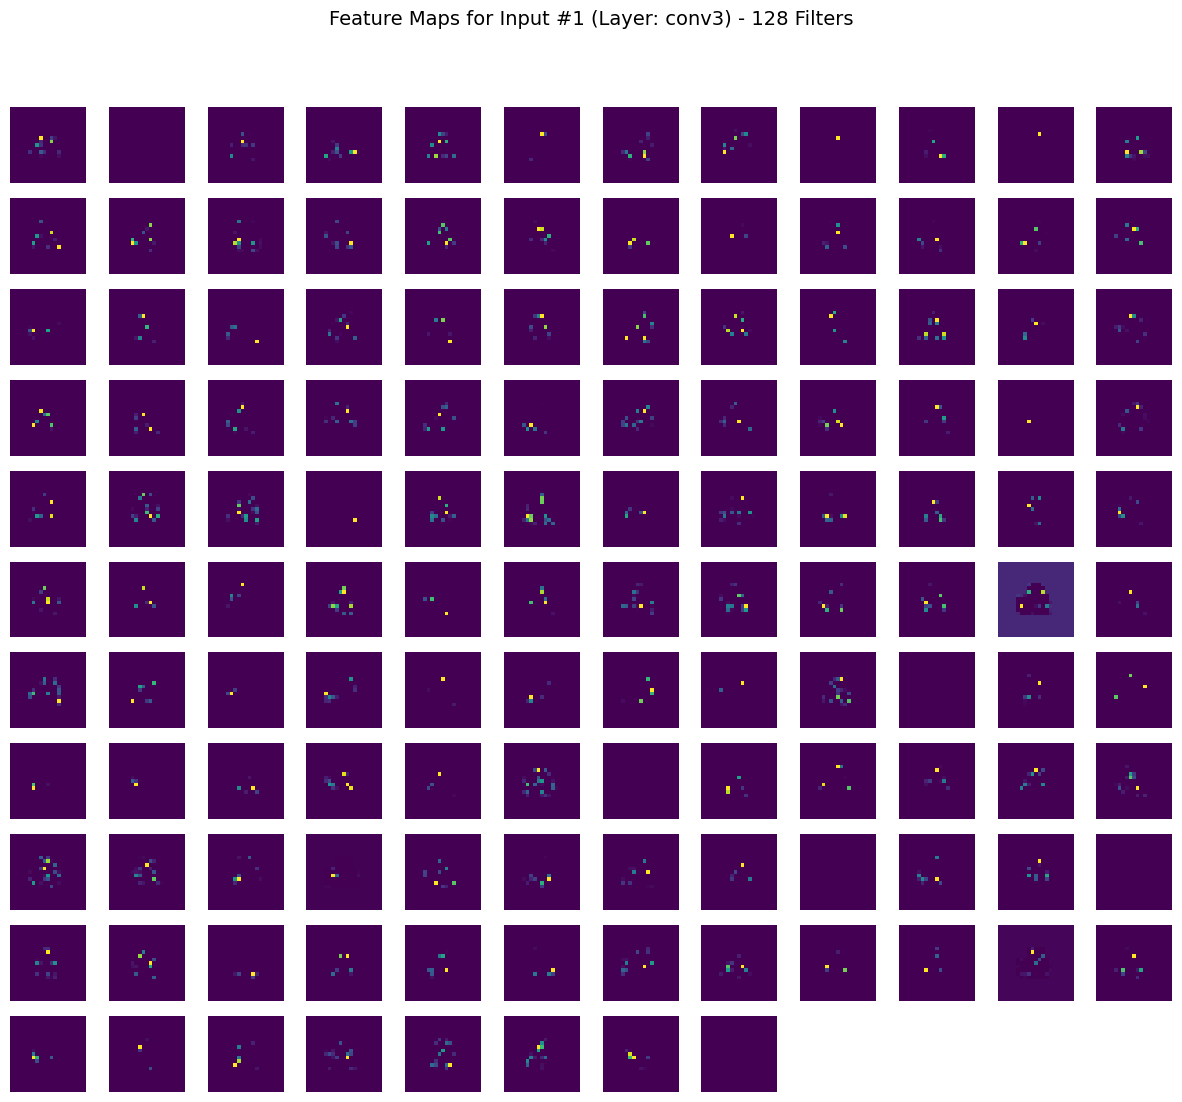

Visualizing Feature Maps for Top Input #2 (Index: 12435)


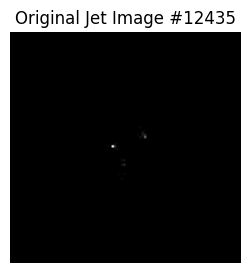

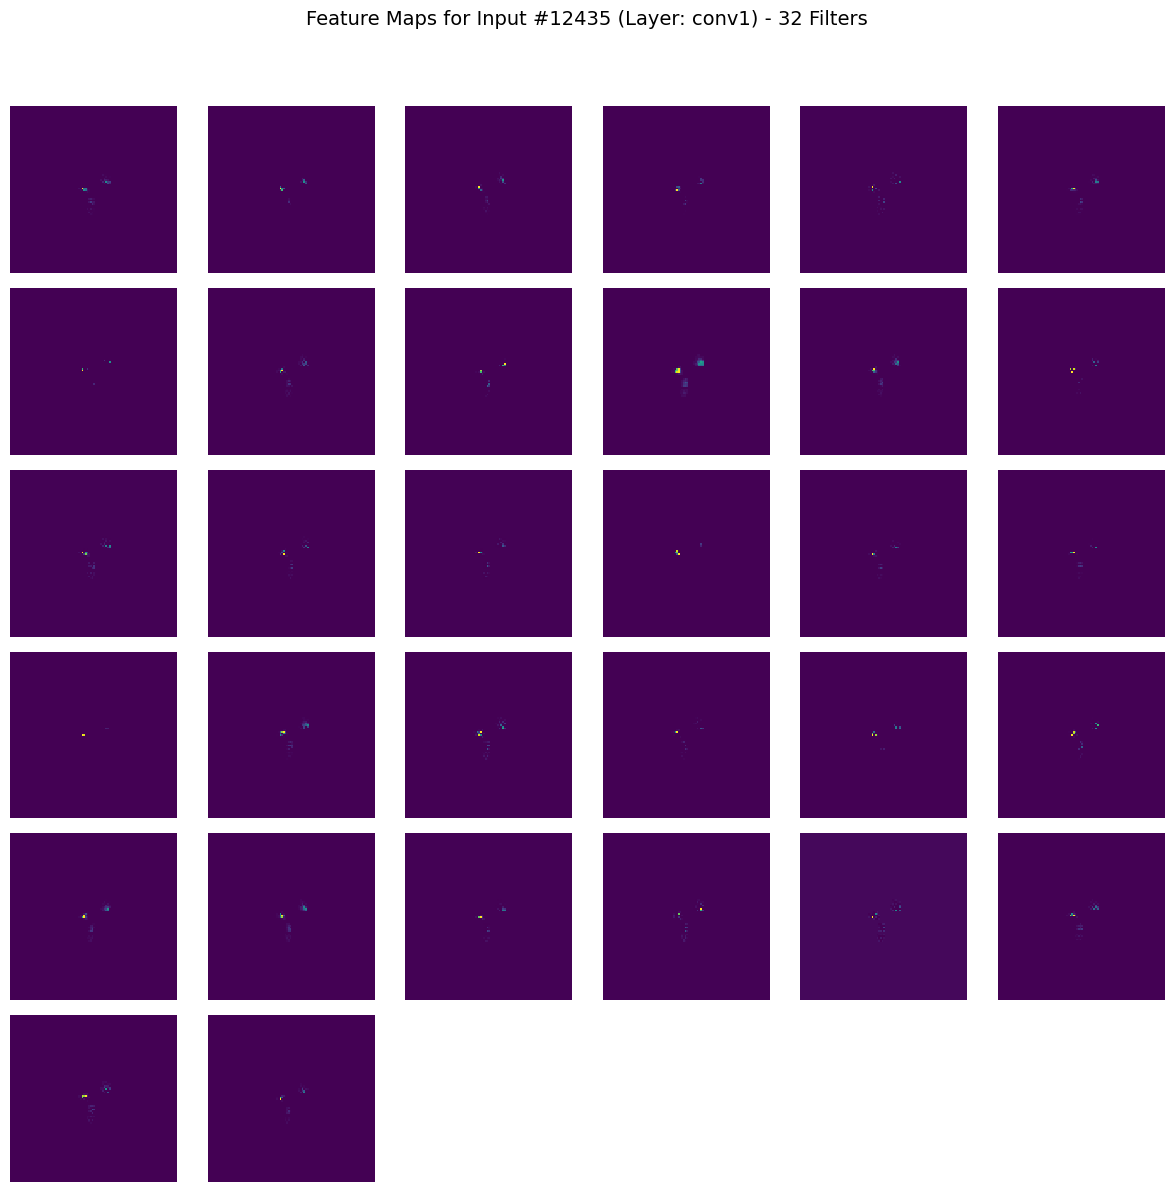

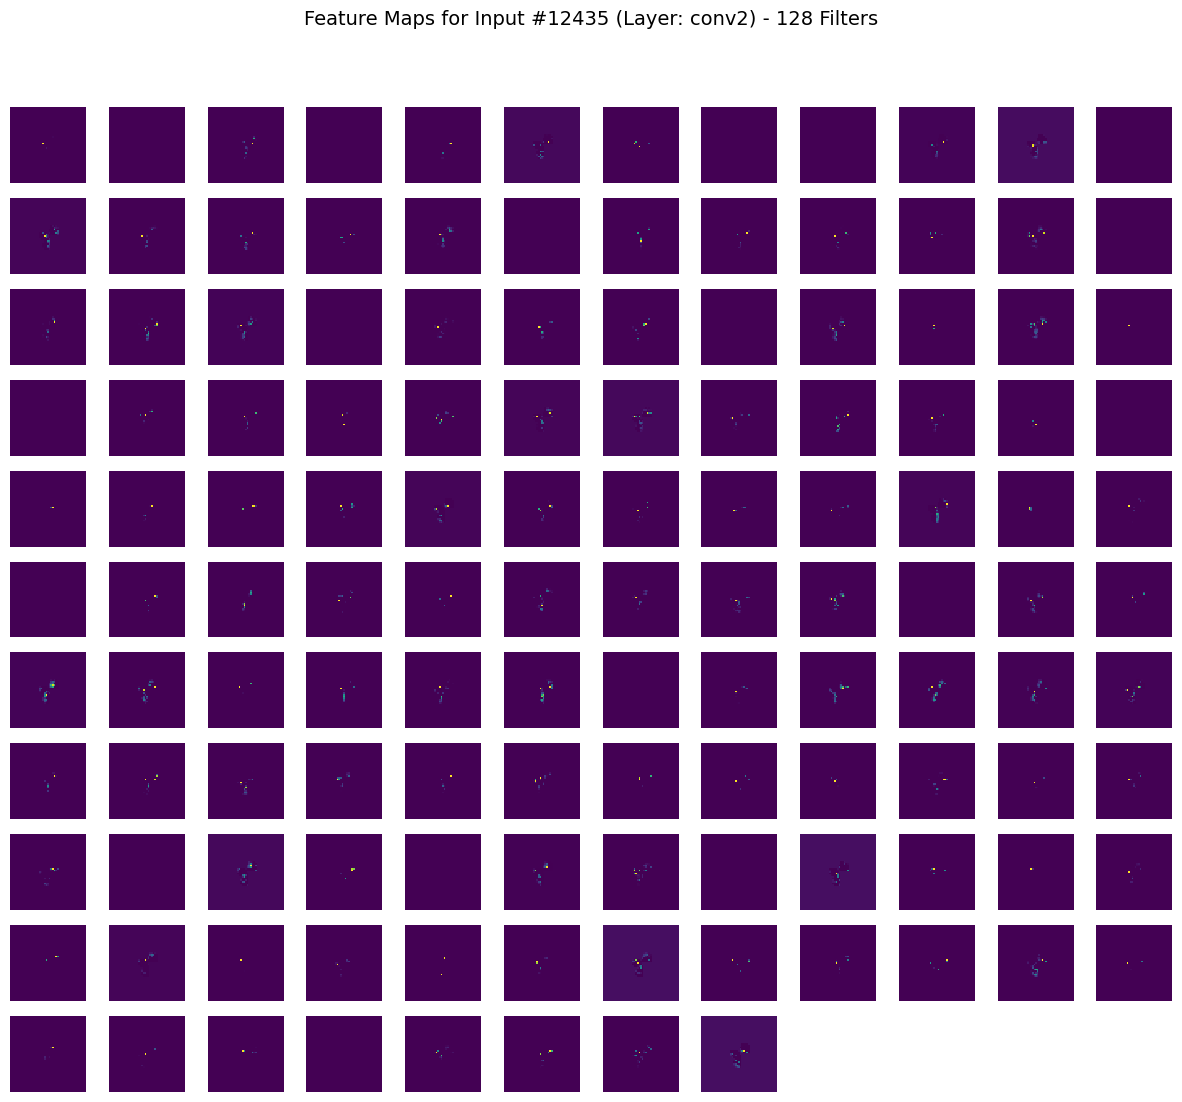

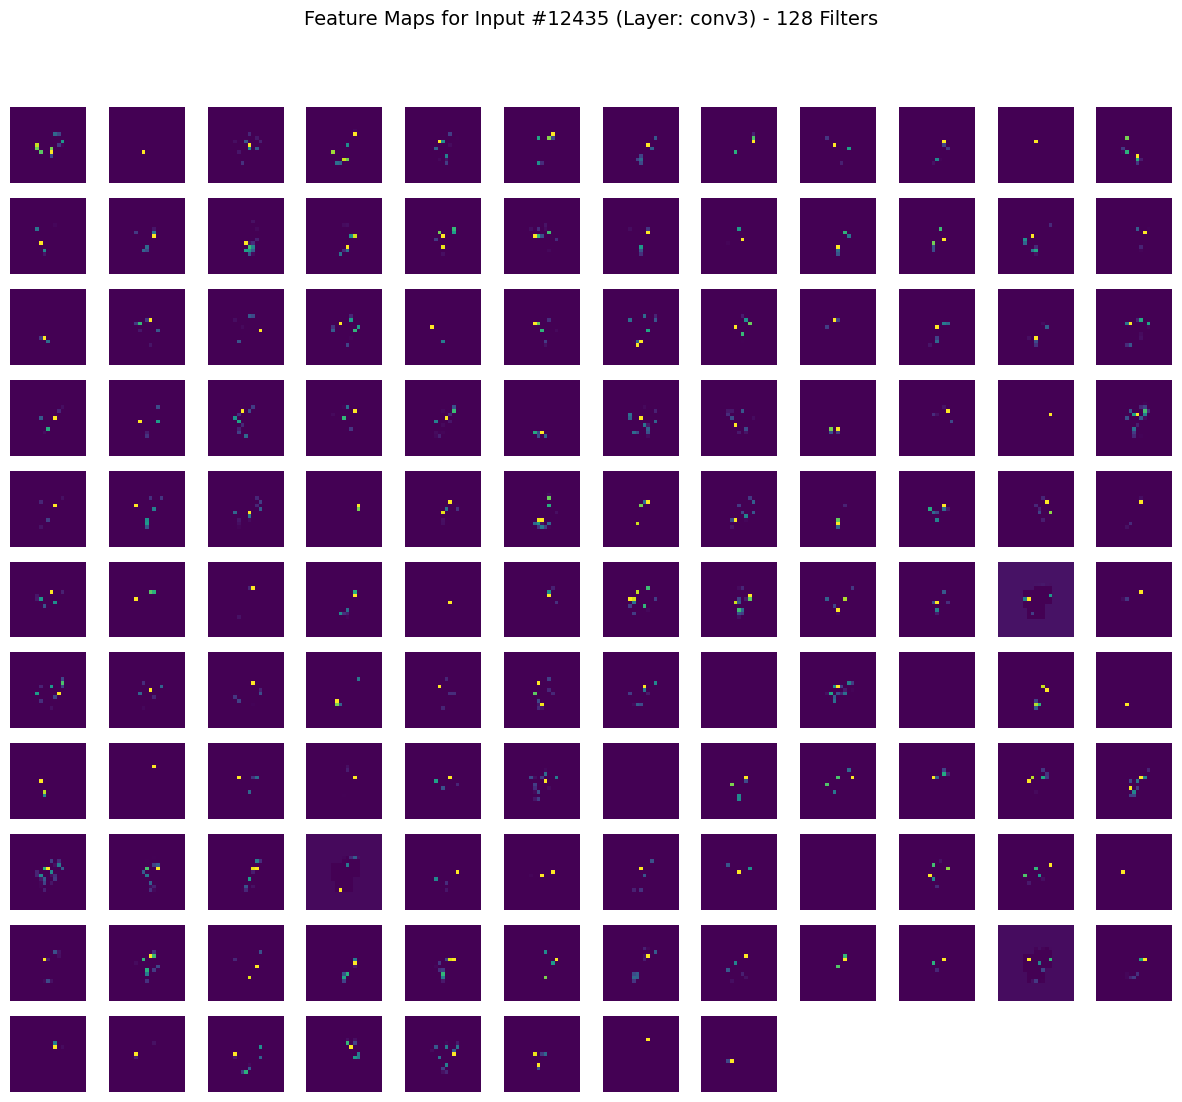

Visualizing Feature Maps for Top Input #3 (Index: 12426)


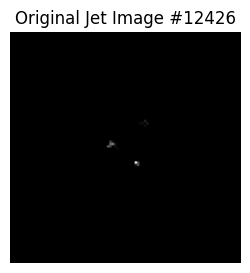

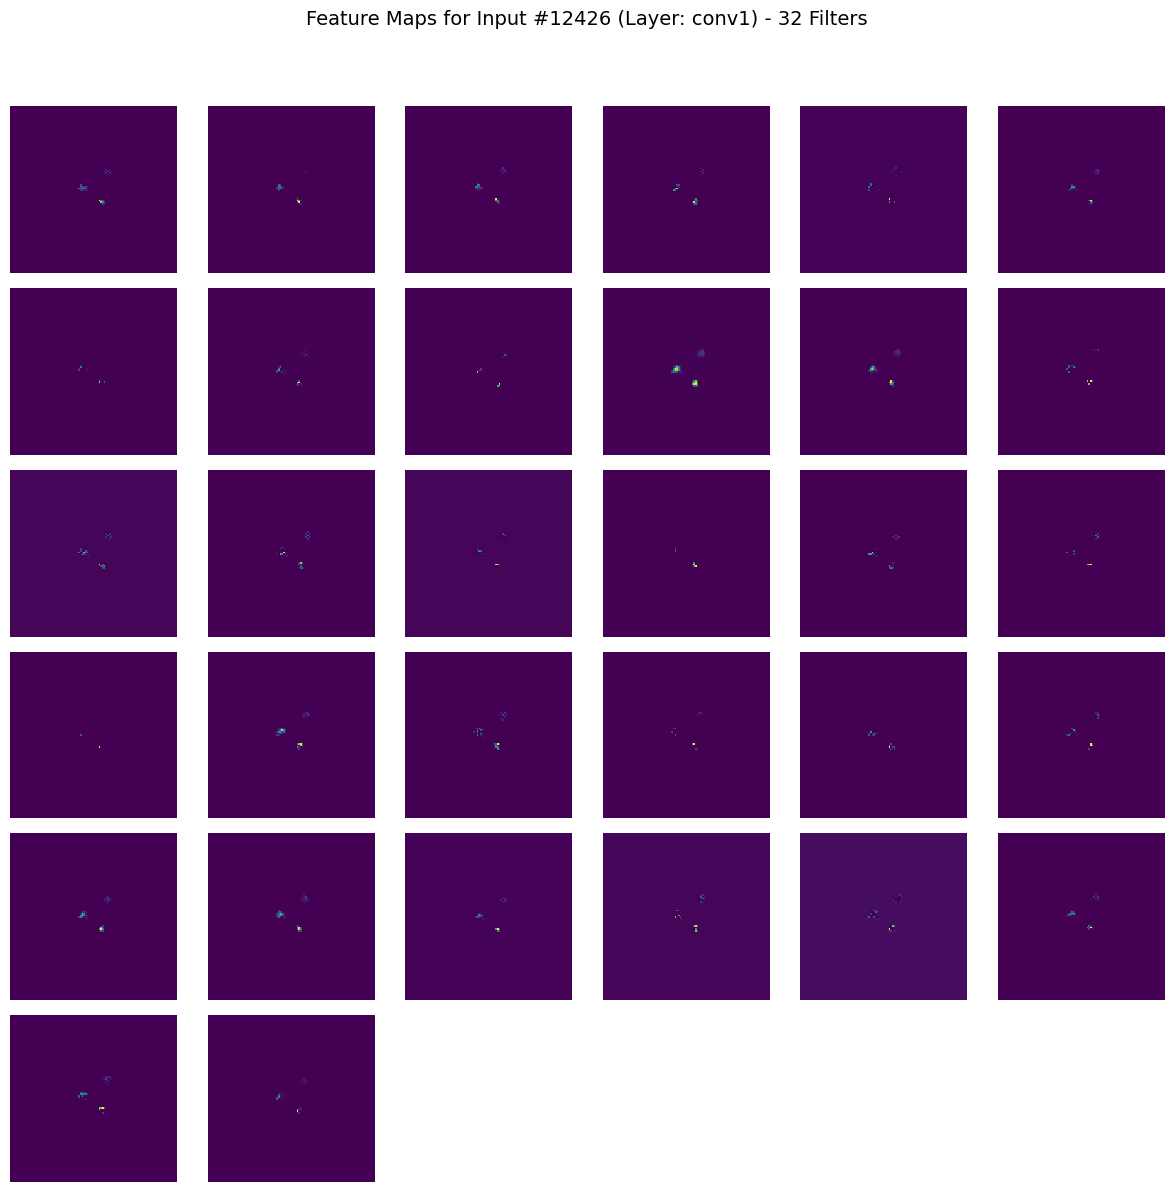

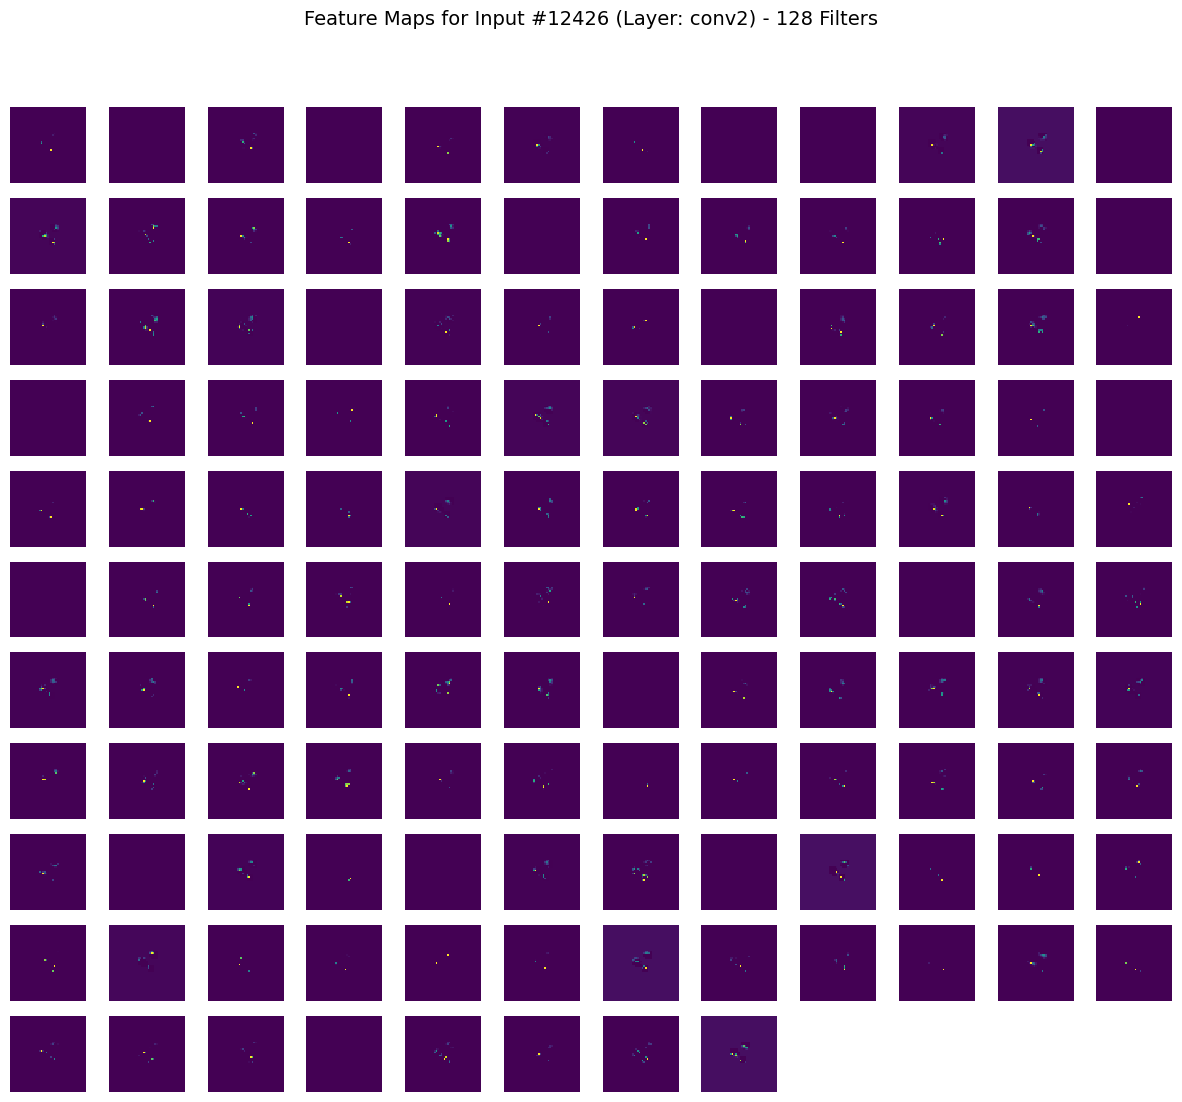

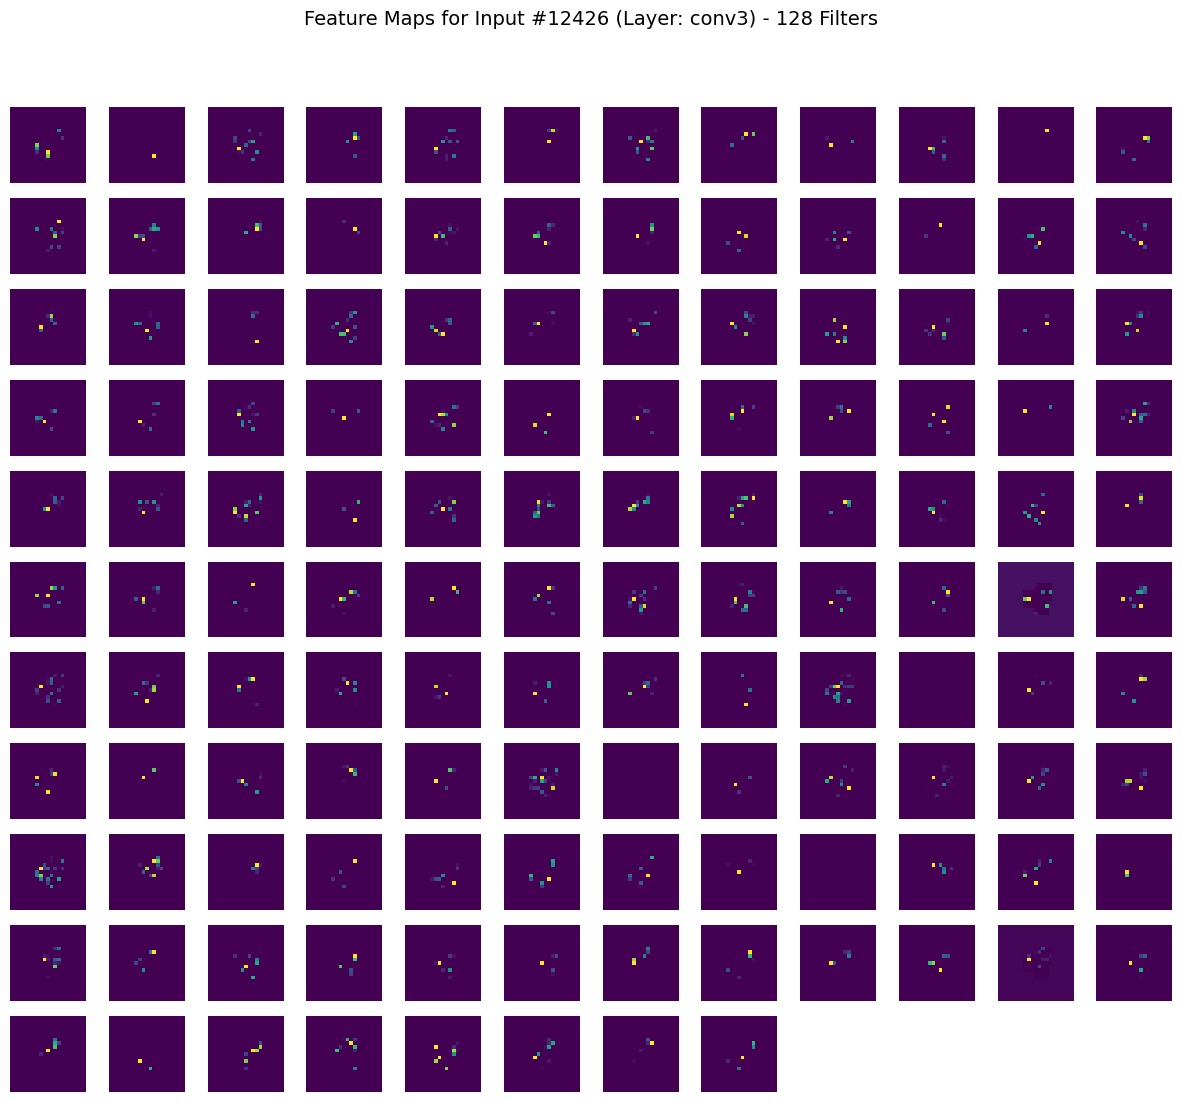

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
import math

correct_indices = np.where(y_true == y_pred_classes)[0]
correct_probabilities = y_pred[correct_indices, y_true[correct_indices]]
sorted_confidence_indices_relative = np.argsort(correct_probabilities)[::-1]
top_3_indices = correct_indices[sorted_confidence_indices_relative[:3]]

print(f"Indices in X_test of the Top 3 Highest Accuracy Inputs: {top_3_indices}")
top_3_images = X_test[top_3_indices]


def create_feature_extractor(model, layer_name):
    """
    Creates a Keras functional model to output the activation of a specific layer.
    Handles Sequential model input by accessing the first layer's input tensor.
    """
    
    input_shape_tuple = (100, 100, 1)
    if model.layers and hasattr(model.layers[0], 'batch_input_shape'):
        input_shape_tuple = model.layers[0].batch_input_shape[1:] 
    if not model.built:
        model.build(input_shape=(None,) + input_shape_tuple) 
    try:
        layer_output = model.get_layer(layer_name).output
        input_tensor = None
        if model.layers and hasattr(model.layers[0], 'input'):
            input_tensor = model.layers[0].input
        if input_tensor is None and hasattr(model, 'input'):
            input_tensor = model.input  
        if input_tensor is None:
             raise AttributeError("Could not determine model input tensor.")
      
        feature_extractor = Model(inputs=input_tensor, outputs=layer_output)
        return feature_extractor
        
    except ValueError as e:
        print(f"Warning: Layer '{layer_name}' not found. Error: {e}. Skipping.")
        return None
    except AttributeError as e:

        print(f"Critical Error in creating feature extractor: {e}")
        return None


def visualize_feature_maps(feature_extractor, input_image, layer_name, image_idx):
    """Generates and plots the feature maps for a single input image."""
    img_tensor = np.expand_dims(input_image, axis=0) 
    feature_maps = feature_extractor.predict(img_tensor, verbose=0)
    feature_maps = np.squeeze(feature_maps, axis=0)
    
    if feature_maps.ndim == 1:
        print(f"Skipping visualization for layer '{layer_name}' (Output is flattened).")
        return

    num_filters = feature_maps.shape[-1]
    
    size = int(math.ceil(math.sqrt(num_filters)))
    

    fig, axes = plt.subplots(size, size, figsize=(12, 12))
    fig.suptitle(f'Feature Maps for Input #{image_idx} (Layer: {layer_name}) - {num_filters} Filters', 
                 fontsize=14, y=1.02)
    
    for i in range(num_filters):
        row = i // size
        col = i % size
        ax = axes[row, col]
        
       
        ax.matshow(feature_maps[:, :, i], cmap='viridis') 
        ax.axis('off')
        

    for i in range(num_filters, size*size):
        row = i // size
        col = i % size
        fig.delaxes(axes[row, col])

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()


layers_to_visualize = ['conv1', 'conv2', 'conv3'] 

for i, img in enumerate(top_3_images):
    current_idx = top_3_indices[i]
    
    
    print(f"Visualizing Feature Maps for Top Input #{i+1} (Index: {current_idx})")
    
    
    # Display the original image
    plt.figure(figsize=(3, 3))
    # Remove the channel dimension (100, 100, 1) -> (100, 100) for display
    plt.imshow(img.reshape(100, 100), cmap='gray') 
    plt.title(f"Original Jet Image #{current_idx}")
    plt.axis('off')
    plt.show()

    for layer_name in layers_to_visualize:
        feature_extractor = create_feature_extractor(model, layer_name)
        
        if feature_extractor:
            visualize_feature_maps(feature_extractor, img, layer_name, current_idx)





Overall Test Accuracy: 0.9661
Correct Predictions: 28983 / 30000

Analyzing 10 Misclassified Jets (Indices: [10, 39, 49, 52, 121, 128, 207, 236, 269, 332])


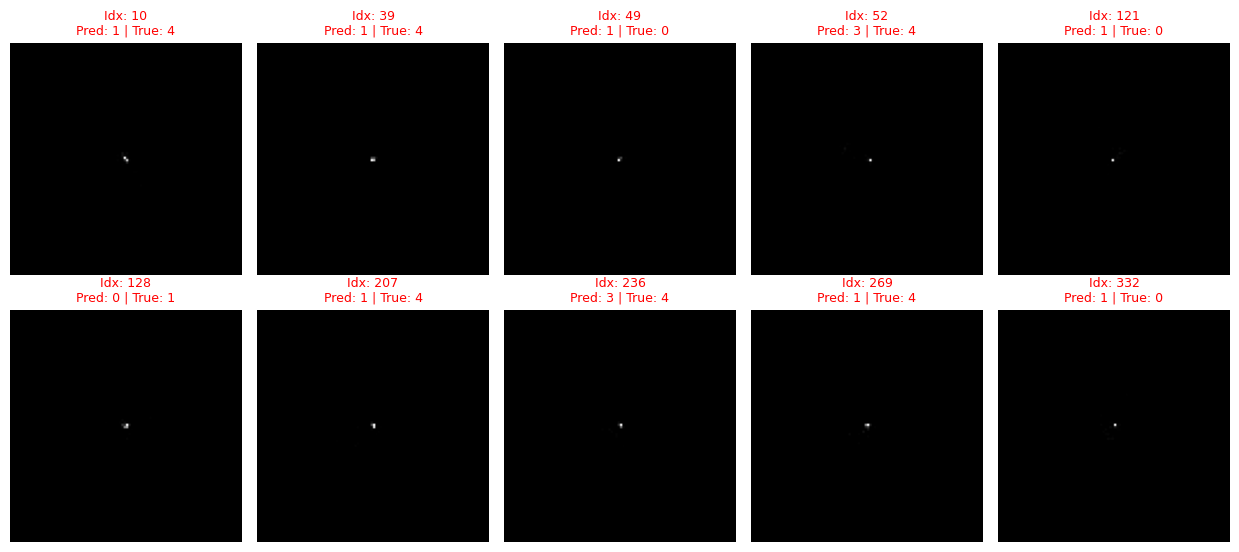

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
try: 
    X_test 
    y_true
    y_pred_classes
except NameError:
    print("Warning: Using mock data since X_test, y_true, or y_pred_classes are not defined.")
    N_SAMPLES = 1000
    IMG_SIZE = 100
    NUM_CLASSES = 5
    X_test = np.random.rand(N_SAMPLES, IMG_SIZE, IMG_SIZE, 1).astype('float32')
    y_true = np.random.randint(0, NUM_CLASSES, N_SAMPLES)
    y_pred_classes = np.copy(y_true)
    y_pred_classes[:20] = (y_pred_classes[:20] + 1) % NUM_CLASSES # Force first 20 samples to be wrong


def calculate_and_print_accuracy(y_true, y_pred_classes):
    """Calculates and prints the overall test accuracy."""
    
    total_samples = len(y_true)
    accuracy = accuracy_score(y_true, y_pred_classes)
    correct_predictions = int(accuracy * total_samples) 
    print("\n" + "="*50)
    print(f"Overall Test Accuracy: {accuracy:.4f}")
    print(f"Correct Predictions: {correct_predictions} / {total_samples}")
    print("="*50)
    return accuracy


def analyze_misclassified_jets(X_test, y_true, y_pred_classes, num_to_display=10):
    """
    Displays up to 10 misclassified jet images, showing predicted vs. true labels.
    """ 
    misclassified_indices = np.where(y_true != y_pred_classes)[0] 
    samples_to_show = min(num_to_display, len(misclassified_indices))
    if samples_to_show == 0:
        print(" No misclassified samples found in the test set! (Perfect classification)")
        return
    selected_indices = misclassified_indices[:samples_to_show]
    print(f"\nAnalyzing {samples_to_show} Misclassified Jets (Indices: {selected_indices.tolist()})")
    cols = 5
    rows = math.ceil(samples_to_show / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2.5, rows * 3))
    axes = np.array(axes).flatten() 
    
    for i, idx in enumerate(selected_indices):
        img = X_test[idx].reshape(X_test.shape[1], X_test.shape[2]) 
        ax = axes[i]
        ax.imshow(img, cmap='gray') 
        predicted_label = y_pred_classes[idx]
        true_label = y_true[idx]
        title_color = 'red' 
        ax.set_title(f"Idx: {idx}\nPred: {predicted_label} | True: {true_label}", 
                     fontsize=9, color=title_color)
        ax.axis('off')


    for j in range(samples_to_show, rows * cols):
        if j < len(axes): # Safety check
            fig.delaxes(axes[j])
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()




calculate_and_print_accuracy(y_true, y_pred_classes)


analyze_misclassified_jets(X_test, y_true, y_pred_classes, num_to_display=10)


